In [35]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/Kush/OneDrive/Documents/Sem 4 BDS/ML/Project/Australian Vehicle Prices.csv")

# Display the first few rows of the dataset
data_head = data.head()

# Get a concise summary of the dataframe
data_info = data.info()

# Display the statistical summary of numerical columns
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

(           Brand    Year   Model               Car/Suv  \
 0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
 1             MG  2022.0     MG3             Hatchback   
 2            BMW  2022.0    430I                 Coupe   
 3  Mercedes-Benz  2011.0    E500                 Coupe   
 4        Renault  2022.0  Arkana                   SUV   
 
                                        Title UsedOrNew Transmission  \
 0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
 1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
 2                      2022 BMW 430I M Sport      USED    Automatic   
 3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
 4                 2022 Renault Arkana Intens      USED    Automatic   
 
          Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
 0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
 1  4 cyl, 1.5 L     Front   Premium  6.7 L / 

Total Entries: 16,734 vehicles with 19 attributes each.

Attributes: Includes 'Brand', 'Year', 'Model', 'Car/Suv', 'Title','UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats', 'Price'.

Data Types: Mostly categorical (object type) with 'Year' being numerical. Many attributes that appear numerical or categorical, such as 'Price', 'Kilometres', and 'Doors', are actually loaded as object types, indicating they may contain non-numeric characters or have been formatted as text.

Missing Values: Some columns like 'Car/Suv', 'Location', 'BodyType', 'Doors', and 'Seats' have missing values, which will need to be addressed.

# Data Cleaning

In [36]:
import pandas as pd
# 1. Convert 'Price', 'Kilometres', 'Doors', and 'Seats' to numeric, handling errors by coercing to NaN
data['Price'] = pd.to_numeric(data['Price'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
data['Kilometres'] = pd.to_numeric(data['Kilometres'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
data['Doors'] = pd.to_numeric(data['Doors'].str.extract('(\d+)')[0], errors='coerce')
data['Seats'] = pd.to_numeric(data['Seats'].str.extract('(\d+)')[0], errors='coerce')

# 2. Fill missing values for numeric columns with the median
data['Price'].fillna(data['Price'].median(), inplace=True)
data['Kilometres'].fillna(data['Kilometres'].median(), inplace=True)
data['Doors'].fillna(data['Doors'].median(), inplace=True)
data['Seats'].fillna(data['Seats'].median(), inplace=True)

# 3. For categorical columns with missing values, fill with 'Unknown'
categorical_columns_with_na = ['Car/Suv', 'Location', 'BodyType']
for column in categorical_columns_with_na:
    data[column].fillna('Unknown', inplace=True)

# Optionally, display the cleaned data statistics to verify the changes
cleaned_data_description = data.describe(include='all')
print(cleaned_data_description)



         Brand          Year  Model Car/Suv                    Title  \
count    16733  16733.000000  16733   16734                    16733   
unique      76           NaN    781     619                     8804   
top     Toyota           NaN  Hilux     SUV  2019 Hyundai I30 Active   
freq      2784           NaN    430    5921                       60   
mean       NaN   2016.229248    NaN     NaN                      NaN   
std        NaN      5.247705    NaN     NaN                      NaN   
min        NaN   1940.000000    NaN     NaN                      NaN   
25%        NaN   2013.000000    NaN     NaN                      NaN   
50%        NaN   2017.000000    NaN     NaN                      NaN   
75%        NaN   2020.000000    NaN     NaN                      NaN   
max        NaN   2023.000000    NaN     NaN                      NaN   

       UsedOrNew Transmission      Engine DriveType  FuelType FuelConsumption  \
count      16733        16733       16733     16733   

# Exploratory Data Analysis (EDA):

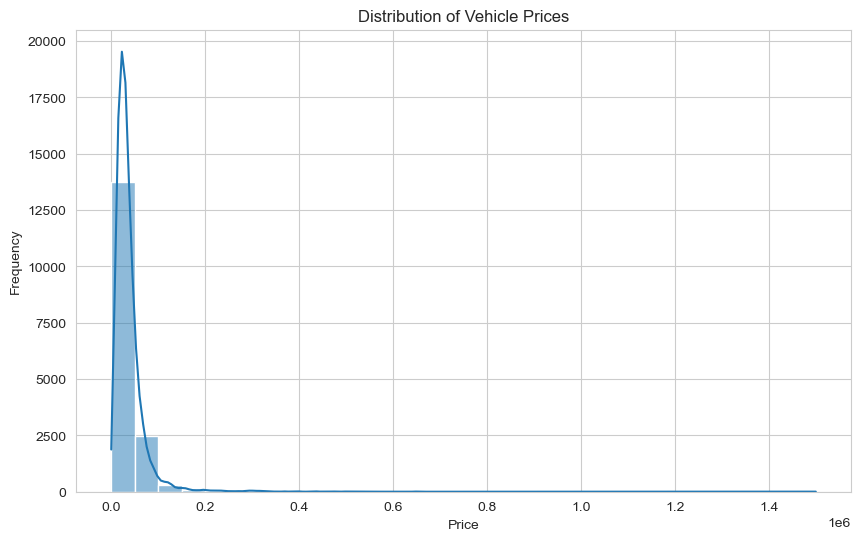

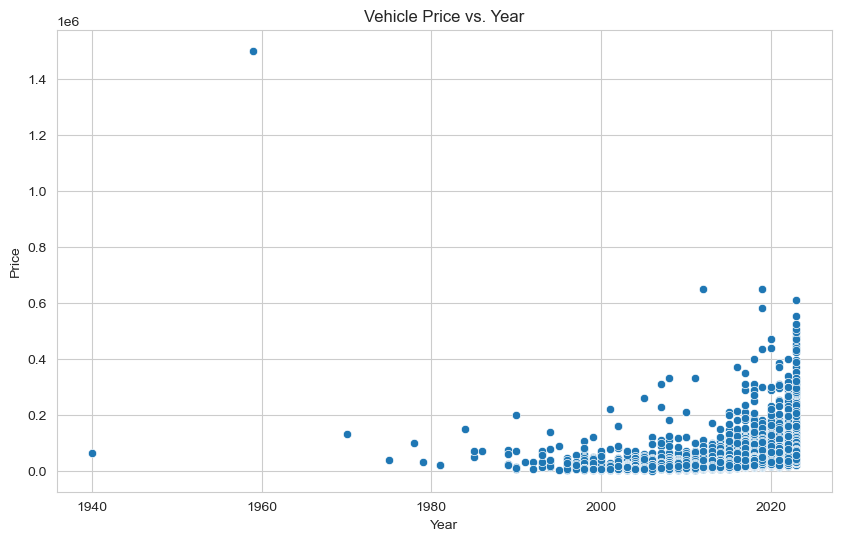

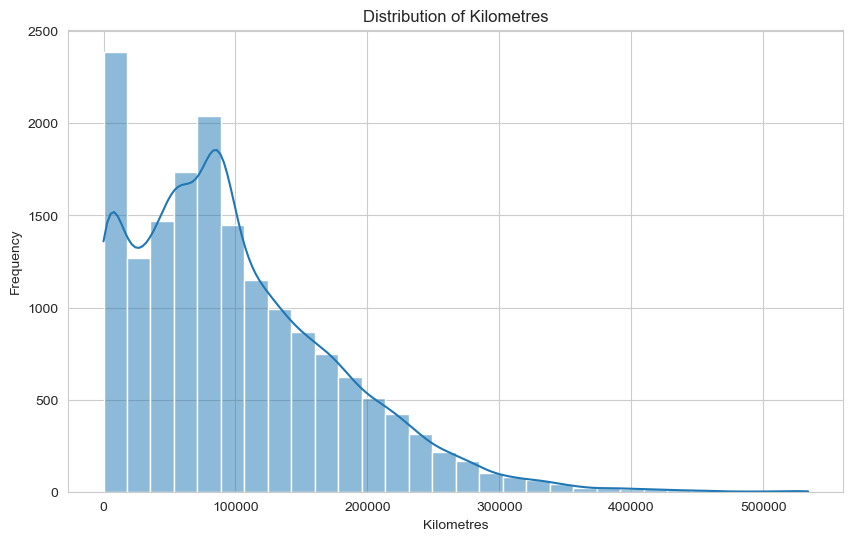

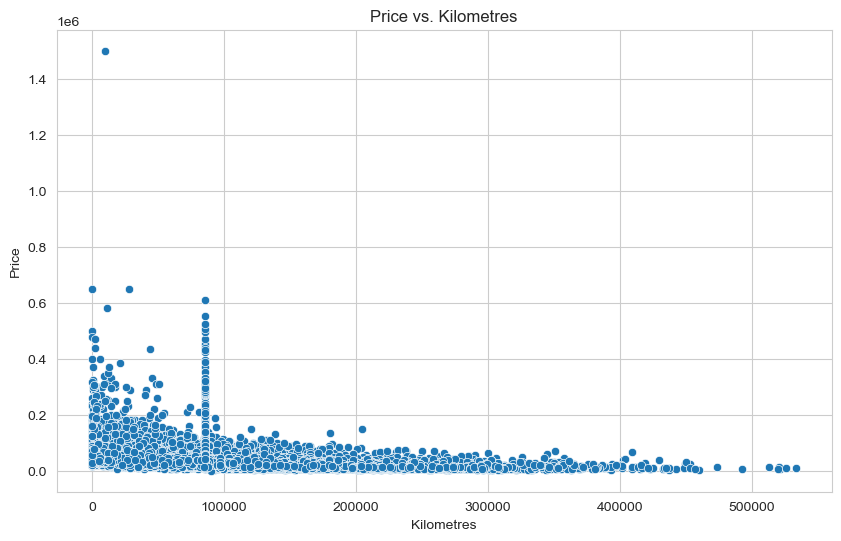

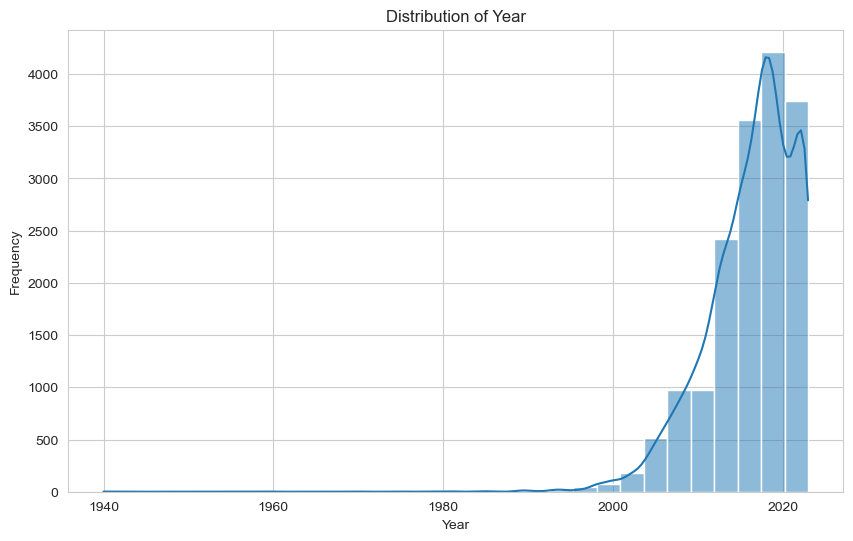

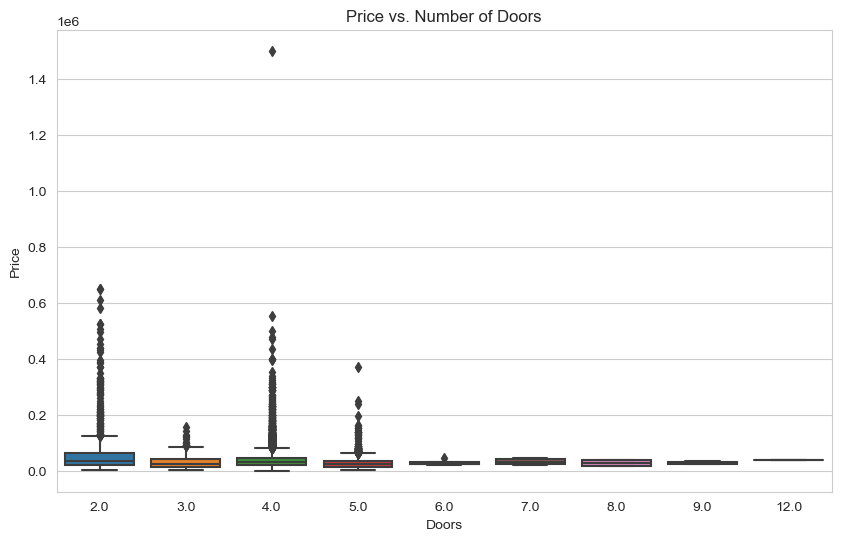

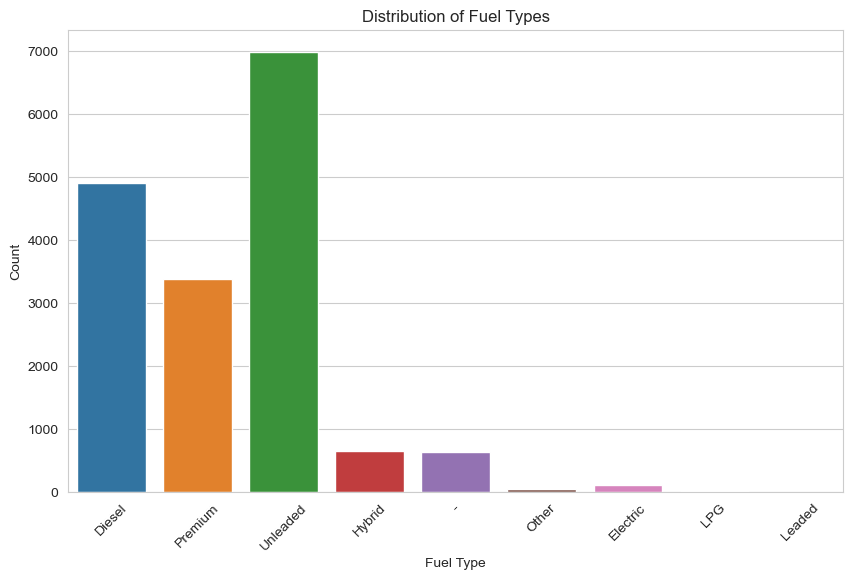

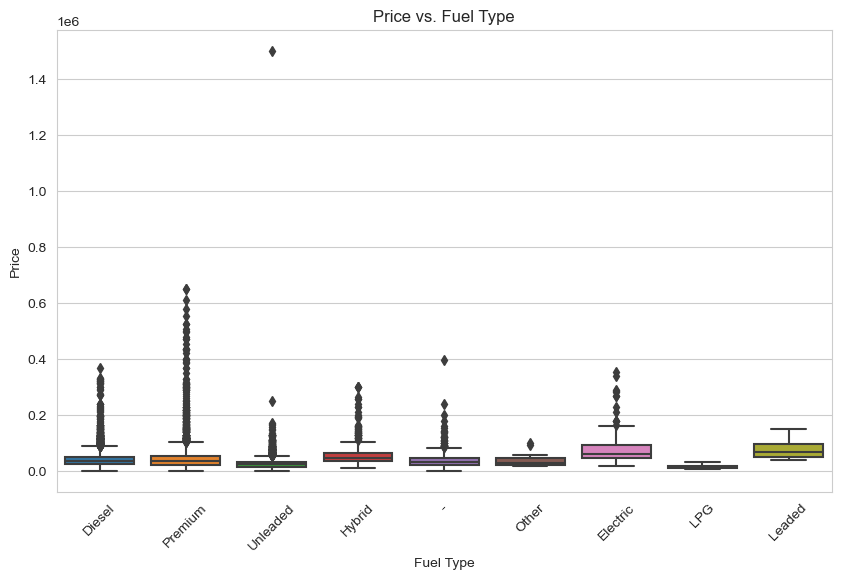

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
#Distribution of Vehicle Prices: You've visualized how vehicle prices are spread across your dataset, which helps identify the range most prices fall into and any outliers.
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Vehicle Price vs. Year: This plot highlights the relationship between the vehicle's manufacturing year and its price, indicating a potential trend where newer vehicles tend to be more expensive.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=data)
plt.title('Vehicle Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#Distribution of Kilometres: Understanding how many kilometres vehicles have on the odometer helps in analyzing the impact of usage on price.
#co relation Matrix
plt.figure(figsize=(10, 6))
sns.histplot(data['Kilometres'], bins=30, kde=True)
plt.title('Distribution of Kilometres')
plt.xlabel('Kilometres')
plt.ylabel('Frequency')
plt.show()

#Price vs. Kilometres: This scatter plot examines how vehicle price relates to the number of kilometres driven, likely showing that vehicles with lower kilometres may fetch higher prices.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometres', y='Price', data=data)
plt.title('Price vs. Kilometres')
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.show()

#Distribution of Year: Seeing the year distribution helps understand the age range of the vehicles in your dataset.
plt.figure(figsize=(10, 6))
sns.histplot(data['Year'], bins=30, kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

#Price vs. Number of Doors: This analysis explores whether the number of doors on a vehicle influences its market price.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Doors', y='Price', data=data)
plt.title('Price vs. Number of Doors')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

#Distribution of Fuel Types: Identifying the variety and frequency of fuel types available in your dataset helps in understanding market preferences.
plt.figure(figsize=(10, 6))
sns.countplot(x='FuelType', data=data)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Price vs. Fuel Type: By comparing vehicle prices across different fuel types, you can deduce if certain fuel types are associated with higher or lower prices.
plt.figure(figsize=(10, 6))
sns.boxplot(x='FuelType', y='Price', data=data)
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


# Feature Engineering

1. Create New Features:
Vehicle Age: A vehicle's price is likely influenced by its age. You can create a new feature representing the age of the vehicle by subtracting the 'Year' column from the current year.

2. Encode Categorical Variables:
Many machine learning models require numerical input features, so it's essential to encode categorical variables.


One-Hot Encoding: Suitable for nominal categorical variables without an intrinsic order. This method transforms each categorical value into a new binary column.

Label Encoding: For ordinal categorical variables (those with a clear ordering), you can replace categories with ordinal numbers based on their ordering.

In [38]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Current year for calculating vehicle age
current_year = np.max(data['Year'])

# Create 'VehicleAge' feature
data['VehicleAge'] = current_year - data['Year']

# Selecting categorical variables for one-hot encoding
categorical_features = ['FuelType', 'Transmission', 'DriveType']

# Performing one-hot encoding
one_hot_encoded_data = pd.get_dummies(data[categorical_features])

# Drop the original categorical columns and concatenate the new one-hot encoded columns
data_prepared = data.drop(categorical_features, axis=1)
data_prepared = pd.concat([data_prepared, one_hot_encoded_data], axis=1)

# Display the first few rows of the prepared dataset to verify changes
data_prepared.head()


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Engine,FuelConsumption,Kilometres,ColourExtInt,...,FuelType_Premium,FuelType_Unleaded,Transmission_-,Transmission_Automatic,Transmission_Manual,DriveType_4WD,DriveType_AWD,DriveType_Front,DriveType_Other,DriveType_Rear
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,"4 cyl, 2.2 L",8.7 L / 100 km,5595.0,White / Black,...,0,0,0,1,0,0,1,0,0,0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,"4 cyl, 1.5 L",6.7 L / 100 km,16.0,Black / Black,...,1,0,0,1,0,0,0,1,0,0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,"4 cyl, 2 L",6.6 L / 100 km,8472.0,Grey / White,...,1,0,0,1,0,0,0,0,0,1
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,"8 cyl, 5.5 L",11 L / 100 km,136517.0,White / Brown,...,1,0,0,1,0,0,0,0,0,1
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,"4 cyl, 1.3 L",6 L / 100 km,1035.0,Grey / Black,...,0,1,0,1,0,0,0,1,0,0


# Data Preprocessing

In [39]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data_prepared.drop(['Price', 'Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Engine', 'FuelConsumption', 'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType'], axis=1)
y = data_prepared['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the splits to confirm the sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((13387, 22), (3347, 22), (13387,), (3347,))

# Model Selection and Training

Training Set: 13,387 samples (features and target)

Test Set: 3,347 samples (features and target)

This split will allow us to train machine learning models on the training set and evaluate their performance on the test set, ensuring that the evaluation is based on data that the models have not seen during training.

we encountered an error due to NaN values present in the input features (X). Before proceeding with model training, we need to address these missing values.

A common approach to handling NaN values in the dataset includes:

Imputation: Replacing missing values with a statistic like the mean, median, or mode of the column.

Removal: Dropping rows or columns with missing values, which is generally less preferred due to the potential loss of data.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR 
import numpy as np

# Assuming X and y are already defined and ready for use

# Imputing missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the imputed data into training and testing sets again
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Redefine the models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Retraining models on the imputed data
results_imputed = {}

for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    predictions = model.predict(X_test_imputed)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    results_imputed[name] = rmse

results_imputed



{'Linear Regression': 29181.120914790103,
 'Decision Tree Regressor': 31295.317286010126,
 'Random Forest Regressor': 25013.76837772791,
 'Gradient Boosting Regressor': 25358.241672042157,
 'Support Vector Regressor': 35607.117725071475}